## Perceptron

In [17]:
import numpy as np

In [18]:
class Perceptron:
    def __init__(self, eta=0.01, n_iter=10,random_state=1):
        self.eta = eta # learning rate (between 0.0 and 1.0)
        self.n_iter = n_iter # Passes over the training dataset
        self.random_state = random_state # Random number generator seed for random weight initialization

    def fit(self, X, y):
        """Fit training data
        X: {array-like}, shape = [n_samples, n_features]
        y: {array-like}, shape = [n_samples]
        """
        rgen = np.random.RandomState(self.random_state) # Random number generator
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1]) # Initialize weights to small random numbers # np.zeros(X.shape[1]) is also OK
        self.b_ = np.float_(0.) # Initialize bias to 0
        self.errors_ = [] # Number of misclassifications in every epoch

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y): # zip: combine two lists
                update = self.eta * (target - self.predict(xi))
                self.w_ += update * xi # Update weights
                self.b_ += update # Update bias
                errors += int(update != 0.0) # Count misclassifications
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_ # np.dot: matrix multiplication

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, 0) # np.where: ternary operator

In [19]:
import os
import pandas as pd
s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
print('From URL:',s)

From URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


In [20]:
df = pd.read_csv(s,header=None, encoding='utf-8')

In [21]:
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


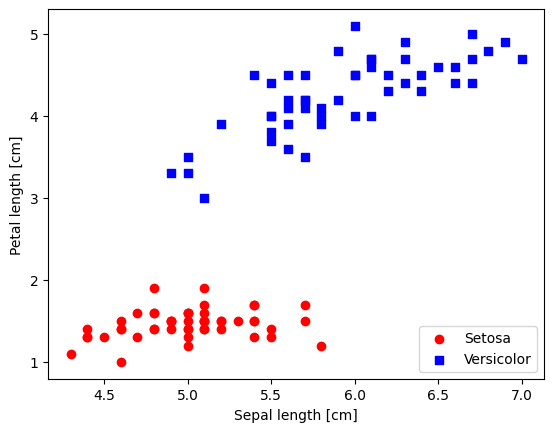

In [22]:
import matplotlib.pyplot as plt
# select setosa and versicolor
y = df.iloc[0:100,4].values
y = np.where(y == 'Iris-setosa', 0,1)
# extract sepal length and petal length
X = df.iloc[0:100, [0,2]].values
#plot data
plt.scatter(X[:50,0],X[:50,1],color='red',marker="o",label='Setosa')
plt.scatter(X[50:100,0],X[50:100,1],color='blue', marker='s',label='Versicolor')
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='lower right')
plt.show()

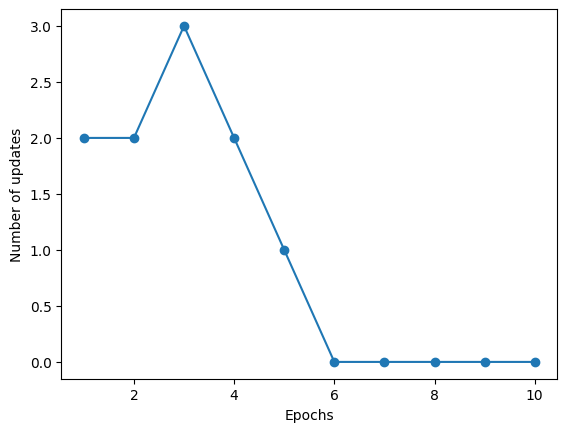

In [23]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X,y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_ ,marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

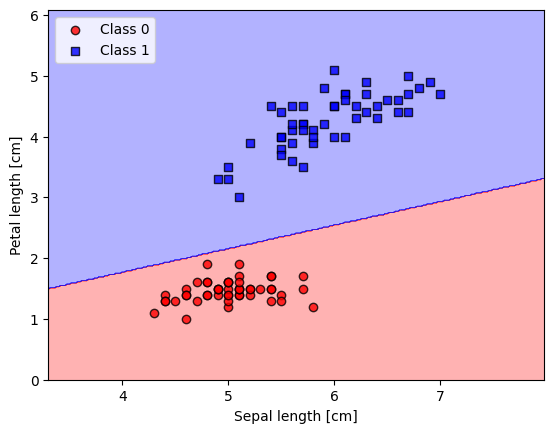

In [24]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X,y,classifier, resolution=0.02):
  markers = ('o','s','^','v','<')
  colors = ('red','blue','lightgreen','gray','cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])

  # plot the decision surface
  x1_min, x1_max = X[:,0].min()-1, X[:,0].max()+1
  x2_min, x2_max = X[:,1].min()-1, X[:,1].max()+1
  xx1,xx2=np.meshgrid(np.arange(x1_min,x1_max,resolution),np.arange(x2_min,x2_max,resolution))
  lab=classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
  lab=lab.reshape(xx1.shape)
  plt.contourf(xx1,xx2,lab,alpha=0.3,cmap=cmap)
  plt.xlim(xx1.min(),xx1.max())
  plt.ylim(xx2.min(),xx2.max())

  # plot class examples
  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y==cl,0],y=X[y==cl,1],alpha=0.8,c=colors[idx],marker=markers[idx],label=f'Class {cl}',edgecolor='black')

plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.show()

In [25]:
class AdalineGD:
  def __init__(self, eta=0.01, n_iter=50,random_state=1):
        self.eta = eta # learning rate (between 0.0 and 1.0)
        self.n_iter = n_iter # Passes over the training dataset
        self.random_state = random_state # Random number generator seed for random weight initialization

  def fit(self, X, y):
      """Fit training data
      X: {array-like}, shape = [n_samples, n_features]
      y: {array-like}, shape = [n_samples]
      """
      rgen = np.random.RandomState(self.random_state) # Random number generator
      self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1]) # Initialize weights to small random numbers # np.zeros(X.shape[1]) is also OK
      self.b_ = np.float_(0.) # Initialize bias to 0
      self.losses_ = [] # Number of misclassifications in every epoch

      for i in range(self.n_iter):
          net_input = self.net_input(X)
          output = self.activation(net_input) # activation function
          errors = (y - output) # errors = (target - predicted)
          self.w_ += self.eta*2.0 * X.T.dot(errors)/ X.shape[0] # Update weights
          self.b_ += self.eta*2.0 * errors.mean() # Update bias
          loss = (errors**2).mean() # Sum of squared errors
          self.losses_.append(loss)
      return self

  def net_input(self, X):
      """Calculate net input"""
      return np.dot(X, self.w_) + self.b_ # np.dot: matrix multiplication

  def activation(self, X):
      """Compute linear activation"""
      return X # f(x) = x

  def predict(self, X):
      """Return class label after unit step"""
      return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0) # np.where: ternary operator

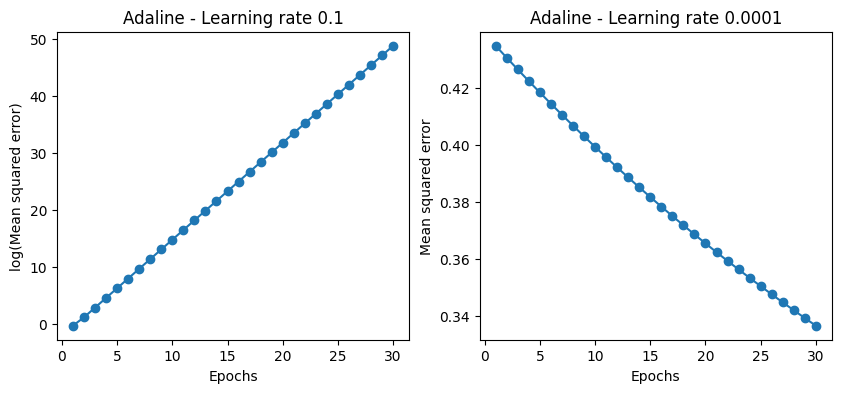

In [26]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
ada1 = AdalineGD(n_iter=30, eta=0.1).fit(X,y)
ax[0].plot(range(1,len(ada1.losses_)+1),np.log10(ada1.losses_),marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Mean squared error)')
ax[0].set_title('Adaline - Learning rate 0.1')
ada2 = AdalineGD(n_iter=30, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.losses_) + 1),ada2.losses_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Mean squared error')
ax[1].set_title('Adaline - Learning rate 0.0001')
plt.show()

In [27]:
X_std=np.copy(X)
X_std[:,0]=(X[:,0]-X[:,0].mean())/X[:,0].std()
X_std[:,1]=(X[:,1]-X[:,1].mean())/X[:,1].std()

In [28]:
ada_gd = AdalineGD(n_iter=20, eta=0.5)
ada_gd.fit(X_std, y)

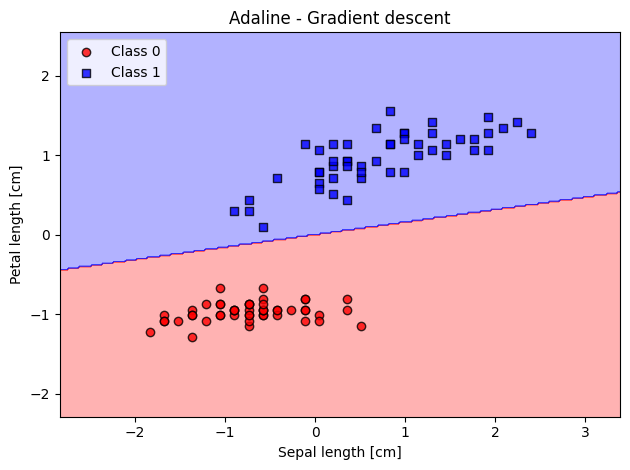

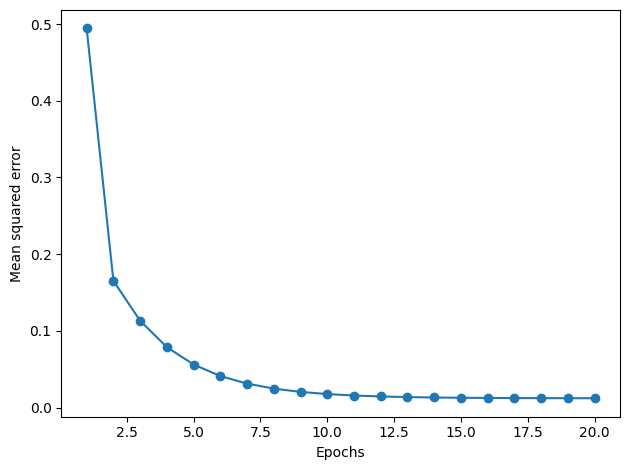

In [29]:
plot_decision_regions(X_std, y, classifier=ada_gd)
plt.title('Adaline - Gradient descent')
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
plt.plot(range(1,len(ada_gd.losses_)+1),ada_gd.losses_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Mean squared error')
plt.tight_layout()
plt.show()

In [30]:
class AdalineSGD:
  def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta # learning rate (between 0.0 and 1.0)
        self.n_iter = n_iter # Passes over the training dataset
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state # Random number generator seed for random weight initialization

  def fit(self, X, y):
      self._initialize_weights(X.shape[1])
      self.losses_ = []

      for i in range(self.n_iter):
          if self.shuffle:
            X, y = self._shuffle(X ,y)
          losses = []
          for xi, target in zip(X,y):
            losses.append(self._update_weights(xi,target))
          avg_loss=np.mean(losses)
          self.losses_.append(avg_loss)
      return self

  def partial_fit(self, X, y):
      """Fit training data without reinitializing the weights"""
      if not self.w_initialized:
        self._initialize_weights(X.shape[1])
      if y.ravel().shape[0] > 1:
        for xi, target in zep(X, y):
          self._update_weights(xi, target)
      else:
        self._update_weights(X, y)
      return self

  def _shuffle(self, X, y):
      """Shuffle training data"""
      r = self.rgen.permutation(len(y))
      return X[r], y[r]

  def _initialize_weights(self, m):
      """Initialize weights to small random numbers"""
      self.rgen = np.random.RandomState(self.random_state)
      self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=m)
      self.b_ = np.float_(0.)
      self.w_initialized = True

  def _update_weights(self, xi, target):
      """Apply Adaline learning rule to update the weights"""
      output = self.activation(self.net_input(xi))
      error = (target - output)
      self.w_ += self.eta * 2.0 * xi * (error)
      self.b_ += self.eta * 2.0 * error
      loss = error**2
      return loss

  def net_input(self, X):
      """Calculate net input"""
      return np.dot(X, self.w_) + self.b_ # np.dot: matrix multiplication

  def activation(self, X):
      """Compute linear activation"""
      return X # f(x) = x

  def predict(self, X):
      """Return class label after unit step"""
      return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0) # np.where: ternary operator

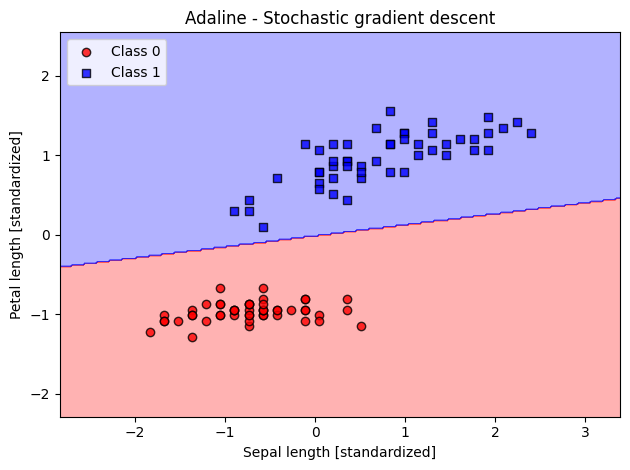

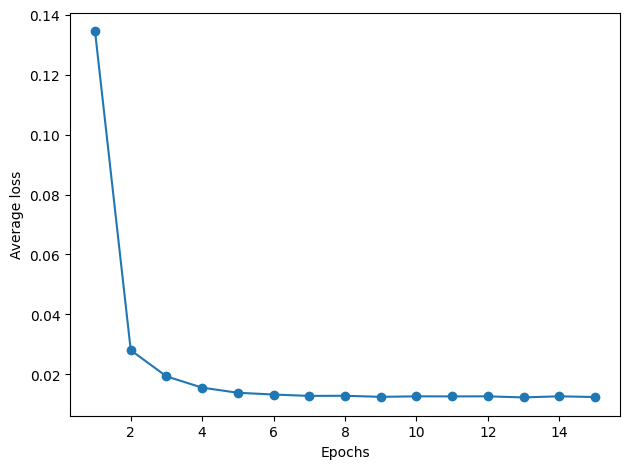

In [32]:
ada_sgd = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada_sgd.fit(X_std, y)
plot_decision_regions(X_std, y, classifier=ada_sgd)
plt.title('Adaline - Stochastic gradient descent')
plt.xlabel('Sepal length [standardized]')
plt.ylabel('Petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
plt.plot(range(1, len(ada_sgd.losses_) + 1), ada_sgd.losses_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average loss')
plt.tight_layout()
plt.show()